# CS345 Spring 2024 Assignment 1

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### Haberman's Dataset

Source: https://www.kaggle.com/datasets/gilsousa/habermans-survival-data-set/data

A simple classification dataset containing only three attributes. The classes here correspond to whether the patient survived or not. The data features here include

1. Age of patient
2. Year of the operation
3. Number of positive axillary nodes detected

### Part 1:  Making the dataset

In the first part of the assignment, you will be asked to download two CSV files listed at
1. https://github.com/sarathsreedharan/CS345/blob/master/spring24/assignment_data/assignment1/survived.csv
2. https://github.com/sarathsreedharan/CS345/blob/master/spring24/assignment_data/assignment1/died.csv

Tasks:
1. Merge them into one numpy array, and then print the shape
2. Next you will be asked to split them into a matrix X consisting of just features corresponding to each datapoint (just the three attributes) and a vector Y containing the labels.

Print the shape of the matrix and vector

In [3]:
# your code goes here

import pandas as pd
import numpy as np

url_survived = "https://raw.githubusercontent.com/sarathsreedharan/CS345/master/spring24/assignment_data/assignment1/survived.csv"
url_died = "https://raw.githubusercontent.com/sarathsreedharan/CS345/master/spring24/assignment_data/assignment1/died.csv"

survived_data = pd.read_csv(url_survived)
died_data = pd.read_csv(url_died)

merged_data = np.concatenate([survived_data, died_data], axis=0)

print("Shape of merged data array:", merged_data.shape)

X = merged_data[:, :-1]
Y = merged_data[:, -1]

print("Shape of feature matrix (X):", X.shape)
print("Shape of label vector (Y):", Y.shape)



Shape of merged data array: (304, 4)
Shape of feature matrix (X): (304, 3)
Shape of label vector (Y): (304,)


### Part 2:  Visualizing the dataset
For the merged dataset from Part 1, provide the following visualizations

1. For both classes plot the histogram that plots how the age of the patient affects the likelihood of survival or death (make a separate plot for each class). Make sure to aggregate ages into bins of five years
2. Create a scatter plot that plots the patient's age (X-axis) against the year of the operation. Use a different color to distinguish the class of each data point.
3. Create a scatter plot that plots the patient's age (X-axis) against the number of positive axillary nodes detected. Use a different color to distinguish the class of each data point.

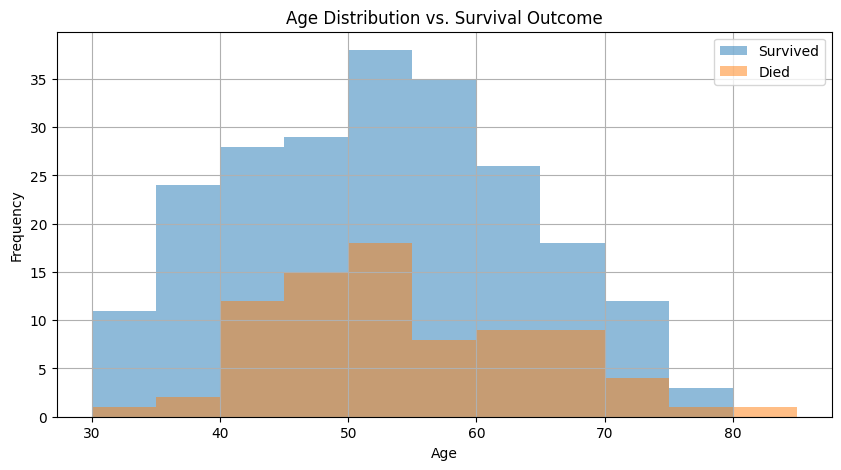

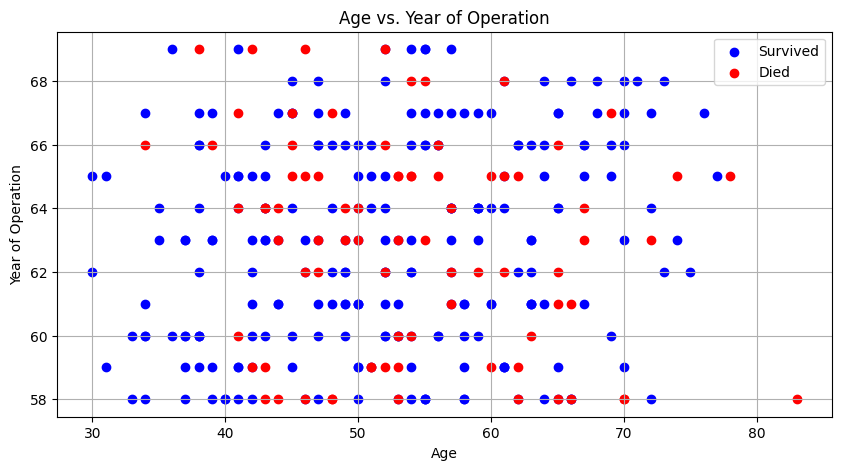

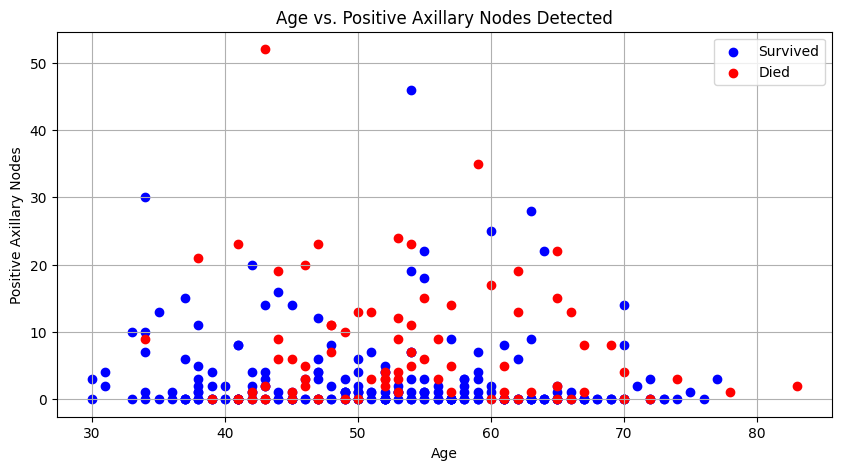

In [4]:
# your code here

import matplotlib.pyplot as plt

age = merged_data[:, 0]
operation_year = merged_data[:, 1]
positive_nodes = merged_data[:, 2]

labels = merged_data[:, -1]  

survived_age = age[labels == 1]
died_age = age[labels == 2]

survived_operation_year = operation_year[labels == 1]
died_operation_year = operation_year[labels == 2]

survived_positive_nodes = positive_nodes[labels == 1]
died_positive_nodes = positive_nodes[labels == 2]

plt.figure(figsize=(10, 5))
plt.hist(survived_age, bins=range(30, 90, 5), alpha=0.5, label='Survived')
plt.hist(died_age, bins=range(30, 90, 5), alpha=0.5, label='Died')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution vs. Survival Outcome')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(survived_age, survived_operation_year, color='blue', label='Survived')
plt.scatter(died_age, died_operation_year, color='red', label='Died')
plt.xlabel('Age')
plt.ylabel('Year of Operation')
plt.title('Age vs. Year of Operation')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(survived_age, survived_positive_nodes, color='blue', label='Survived')
plt.scatter(died_age, died_positive_nodes, color='red', label='Died')
plt.xlabel('Age')
plt.ylabel('Positive Axillary Nodes')
plt.title('Age vs. Positive Axillary Nodes Detected')
plt.legend()
plt.grid(True)
plt.show()


*Discussion of the plots here. Make sure to highlight any insight you may have gleaned from the plots*.

### Part 3: Creating a Train and Test Dataset
Next, you will be tasked with creating a test and training dataset using the above dataset.

First, go through the following code for creating a training and test dataset

In [8]:
def train_test_split(X, y, test_fraction=0.2, seed=42):
    test_len = round(len(X) * test_fraction)
    test_examples = np.zeros(len(X))
    test_examples[:test_len] = 1
    rng = np.random.default_rng(seed)
    rng.shuffle(test_examples)    
    return (X[test_examples == 0],
            y[test_examples==0],
            X[test_examples==1],
            y[test_examples==1])
    
train_test_split(X, Y, test_fraction=0.2, seed=42)


(array([[30, 62,  3],
        [30, 65,  0],
        [31, 59,  2],
        [31, 65,  4],
        [33, 58, 10],
        [34, 58, 30],
        [34, 60,  1],
        [34, 67,  7],
        [34, 60,  0],
        [35, 64, 13],
        [35, 63,  0],
        [36, 69,  0],
        [37, 60,  0],
        [37, 63,  0],
        [37, 59,  6],
        [37, 60, 15],
        [37, 63,  0],
        [38, 59,  2],
        [38, 60,  0],
        [38, 60,  0],
        [38, 62,  3],
        [38, 64,  1],
        [38, 66, 11],
        [38, 60,  1],
        [38, 67,  5],
        [39, 63,  0],
        [39, 67,  0],
        [39, 59,  2],
        [39, 63,  4],
        [40, 58,  2],
        [40, 58,  0],
        [41, 58,  0],
        [41, 64,  0],
        [41, 69,  8],
        [41, 65,  0],
        [41, 65,  0],
        [42, 60,  1],
        [42, 59,  2],
        [42, 61,  4],
        [42, 62, 20],
        [42, 63,  1],
        [43, 63, 14],
        [43, 64,  3],
        [43, 63,  2],
        [43, 66,  4],
        [4

Answer the following:

*Is train_test_split correct?*  If not, explain what the problem is.

*A potential issue might be because of numpy using indexing view creating copies which might cause the values of the return to be different than the python version of the passesin X, y params.

After checking the results I don't think a mistake is present, I was checking for if the returned arrays had split the test data up, which to what I saw it looks like the data is shuffled to some degree.  And what I thought was the mistake gave results that didn't have the correct shape, so I don't think that the indexing problem I originally saw was an issue.*

If the above code isn't correct, implement a new Python function to create a test and train split. Apply this code to the merged dataset from Part 1. If the above function is correct, please use that code directly on the merged dataset.

Next, create a separate scatter plot for each split that plots the patient's age (X-axis) against the number of positive axillary nodes detected.

In [7]:
# Your code goes here
import pandas as pd

def train_test_split(X, y, test_fraction=0.2, seed=42):
    X_df = pd.DataFrame(X)
    y_df = pd.DataFrame(y)
    
    test_len = round(len(X) * test_fraction)
    test_examples = np.zeros(len(X))
    test_examples[:test_len] = 1
    rng = np.random.default_rng(seed)
    rng.shuffle(test_examples)
    
    return (X_df[test_examples == 0].values,
            y_df[test_examples == 0].values,
            X_df[test_examples == 1].values,
            y_df[test_examples == 1].values)
    
train_test_split(X, Y, test_fraction=0.2, seed=42)

(array([[30, 62,  3],
        [30, 65,  0],
        [31, 59,  2],
        [31, 65,  4],
        [33, 58, 10],
        [34, 58, 30],
        [34, 60,  1],
        [34, 67,  7],
        [34, 60,  0],
        [35, 64, 13],
        [35, 63,  0],
        [36, 69,  0],
        [37, 60,  0],
        [37, 63,  0],
        [37, 59,  6],
        [37, 60, 15],
        [37, 63,  0],
        [38, 59,  2],
        [38, 60,  0],
        [38, 60,  0],
        [38, 62,  3],
        [38, 64,  1],
        [38, 66, 11],
        [38, 60,  1],
        [38, 67,  5],
        [39, 63,  0],
        [39, 67,  0],
        [39, 59,  2],
        [39, 63,  4],
        [40, 58,  2],
        [40, 58,  0],
        [41, 58,  0],
        [41, 64,  0],
        [41, 69,  8],
        [41, 65,  0],
        [41, 65,  0],
        [42, 60,  1],
        [42, 59,  2],
        [42, 61,  4],
        [42, 62, 20],
        [42, 63,  1],
        [43, 63, 14],
        [43, 64,  3],
        [43, 63,  2],
        [43, 66,  4],
        [4

### Your Report

Please answer the questions in the cells reserved for that purpose. 

*When submitting the notebook, make sure the result of each code is present*



### Submission

Submit your report as a Jupyter notebook via Canvas. Running the notebook should generate all the plots in your notebook. Any dataset you need to load is expected to be in the same directory as your notebook.

### Grading 

Although we will not grade on a 100 pt scale, the following is a grading sheet that will help you in doing that:  

```
Grading sheet for assignment 1

Part 1:  20 points.
Part 2:  40 points.
  Creation of histograms/scatterplots of features: 30 points
  Discussion of the plots: 10 points
Part 3:  40 points
  Code debugging/possibly writing new code: 20 points
  Creating train/test split: 10 points
  Plotting for train/test split: 10 points
```

*When submitting the notebook, make sure the result of each code is present*


Grading will be based on the following criteria:

  * Code correctness.
  * Plots are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.
  * Notebook is readable, well-organized, and concise.